In [21]:
import pandas as pd
import os
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import A4
from reportlab.lib.colors import HexColor
from matplotlib import pyplot as plt


In [22]:
logo_bracel = r'F:\Qualidade_Florestal\03- ADMINISTRATIVO\2023\06- COLABORADORES\Gabriel\2 - Modelagem\logo - Bracell.jpg'

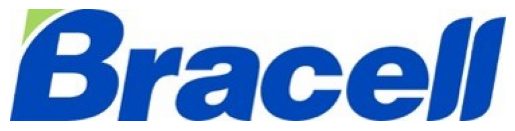

In [23]:
logo = plt.imread(logo_bracel)

plt.imshow(logo)
plt.axis('Off')
plt.show()

In [24]:
path = r"F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvicultura e Sobrevivência\00 - Arquivos Surveys\QualidadedePreparodeSolo_attachments"

In [25]:
path_fotos = []
for i in os.listdir(path):
    fotos= os.path.join(path,i)
    path_fotos.append(fotos)

base_fotos = pd.DataFrame(path_fotos)
base_fotos = base_fotos.rename(columns={0: 'url'})

In [26]:
base_fotos['nome_foto'] = base_fotos['url'].apply(lambda x: x.split("\\")[-1] )
base_fotos['tipo'] = base_fotos['nome_foto'].apply(lambda x: x.split("-")[1] if len(x.split("-")) > 1 else None)
base_fotos['objectid'] = base_fotos['nome_foto'].apply(lambda x: x.split("-")[0] if len(x.split("-")) > 1 else -1).astype(int)
base_fotos = base_fotos.loc[base_fotos['objectid'].notna()]

base_fotos_assinatura = base_fotos.loc[base_fotos['tipo']=='assinatura']
base_fotos_assinatura = base_fotos_assinatura.rename(columns={"tipo":"tipo_assinatura", 'url':'url_assinatura'})

base_fotos_evidencia_nc = base_fotos.loc[base_fotos['tipo']=='evidencia_avaliacao_nc']
base_fotos_evidencia_nc = base_fotos_evidencia_nc.rename(columns={"tipo":"tipo_evidencia", 'url':'url_nc_evidencia'})

base_fotos_parcela = base_fotos.loc[base_fotos['tipo']=='parcela']
base_fotos_parcela = base_fotos_parcela.rename(columns={'tipo':'tipo_parcela', 'url':'url_parcela'})

base_fotos__avaliacao = base_fotos.loc[base_fotos['tipo']=='evidencia_avaliacao']
base_fotos__avaliacao = base_fotos__avaliacao.rename(columns={'tipo':'tipo_avaliacao', 'url':'url_avaliacao'})


In [27]:
url_base_att = r'F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvicultura e Sobrevivência\00 - Arquivos Surveys\Qualidade_de_Preparo_de_Solo_attachments.csv'

In [28]:
url_base_survey = r'F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvicultura e Sobrevivência\00 - Arquivos Surveys\Qualidade_de_Preparo_de_Solo.xlsx'

In [29]:
path_cadastro = r'F:\Qualidade_Florestal\03- ADMINISTRATIVO\2023\06- COLABORADORES\Gabriel\1 - Processamento de dados\Cadastro Florestal.xlsx'

In [30]:
base_att = pd.read_csv(url_base_att,delimiter=",")

In [31]:
cadastro = pd.read_excel(path_cadastro)
cadastro = cadastro[['Talhão','Id Projeto','Projeto']]
cadastro.loc[:, 'Talhão'] = cadastro['Talhão'].fillna('').astype(str).str.split('.').str[0].str.zfill(3)
cadastro.loc[:,'Id Projeto'] = cadastro['Id Projeto'].fillna('').astype(str).str.split('.').str[0].str.zfill(4)
cadastro["Projeto e Talhão"] = cadastro['Id Projeto']+ cadastro['Talhão']

In [32]:
##Filtro para o nível, não é necessário fazer todos os prints e sim apenas os que competem a função
survey = pd.read_excel(url_base_survey)
survey = survey[['objectid','nome_fazenda', 'talhao','nivel','datahoje', 'observacoes_gerais']]
#survey = survey.loc[survey['nivel'] =='2° Nível']
survey['talhao'] = survey['talhao'].fillna('').astype(str).str.split('.').str[0].str.zfill(3)
survey['nome_fazenda'] = survey['nome_fazenda'].fillna('').astype(str).str.split('.').str[0].str.zfill(4)
survey['Projeto e Talhão'] = survey['nome_fazenda']+ survey['talhao']
survey['datahoje'] = survey['datahoje'].dt.date
survey['observacoes_gerais'] = survey['observacoes_gerais'].fillna("")


In [33]:
survey = survey.merge(cadastro, left_on='Projeto e Talhão', right_on='Projeto e Talhão', how = 'left')

In [34]:
survey = survey.merge(base_fotos_assinatura[['url_assinatura','tipo_assinatura','objectid']], left_on='objectid', right_on='objectid',how='left')


In [35]:
survey = survey.merge(base_fotos_evidencia_nc[['url_nc_evidencia','tipo_evidencia','objectid']], left_on='objectid', right_on='objectid',how='left')

In [36]:
survey = survey.merge(base_fotos_parcela[['url_parcela','tipo_parcela','objectid']],left_on='objectid',right_on='objectid',how='left')

In [37]:
survey = survey.merge(base_fotos__avaliacao[['url_avaliacao','tipo_avaliacao','objectid']],left_on='objectid',right_on='objectid', how='left')

In [38]:
survey

,objectid,nome_fazenda,talhao,nivel,datahoje,observacoes_gerais,Projeto e Talhão,Talhão,Id Projeto,Projeto,url_assinatura,tipo_assinatura,url_nc_evidencia,tipo_evidencia,url_parcela,tipo_parcela,url_avaliacao,tipo_avaliacao
0,43,2306,024,1° Nível,2023-07-14,,2306024,024,2306,DOURADINHA II - GLEBA B,F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvi...,assinatura,F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvi...,evidencia_avaliacao_nc,F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvi...,parcela,F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvi...,evidencia_avaliacao
1,3,2348,010,1° Nível,2023-07-12,,2348010,010,2348,BERRANTE II,F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvi...,assinatura,F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvi...,evidencia_avaliacao_nc,F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvi...,parcela,F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvi...,evidencia_avaliacao
2,4,2268,008,1° Nível,2023-07-12,Sem material para coletar parcela circular,2268008,008,2268,PONTAL II,F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvi...,assinatura,F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvi...,evidencia_avaliacao_nc,F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvi...,parcela,F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvi...,evidencia_avaliacao
3,5,0168,015,1° Nível,2023-07-13,Ponyo de.coleta mais ao lado devido a curva da...,0168015,015,0168,BONFIM,F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvi...,assinatura,F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvi...,evidencia_avaliacao_nc,F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvi...,parcela,F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvi...,evidencia_avaliacao
4,6,0168,016,1° Nível,2023-07-13,,0168016,016,0168,BONFIM,F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvi...,assinatura,F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvi...,evidencia_avaliacao_nc,F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvi...,parcela,F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvi...,evidencia_avaliacao
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,624,2091,003,1° Nível,2023-08-03,,2091003,003,2091,ÁGUA BONITA III,F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvi...,assinatura,F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvi...,evidencia_avaliacao_nc,F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvi...,parcela,F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvi...,evidencia_avaliacao
622,625,2091,002,1° Nível,2023-08-04,,2091002,002,2091,ÁGUA BONITA III,F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvi...,assinatura,F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvi...,evidencia_avaliacao_nc,F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvi...,parcela,F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvi...,evidencia_avaliacao
623,626,0175,007,2° Nível,2023-08-04,,0175007,007,0175,PARAÍSO III,F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvi...,assinatura,F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvi...,evidencia_avaliacao_nc,F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvi...,parcela,F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvi...,evidencia_avaliacao
624,627,2323,035,1° Nível,2023-08-03,,2323035,035,2323,TERRA NOVA,F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvi...,assinatura,F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvi...,evidencia_avaliacao_nc,F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvi...,parcela,F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvi...,evidencia_avaliacao


In [39]:
for i in survey['objectid']:
    for i in survey:
        b = survey['url_assinatura'][0]
        print(b)

F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvicultura e Sobrevivência\00 - Arquivos Surveys\QualidadedePreparodeSolo_attachments\43-assinatura-20230714-211237.jpg
F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvicultura e Sobrevivência\00 - Arquivos Surveys\QualidadedePreparodeSolo_attachments\43-assinatura-20230714-211237.jpg
F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvicultura e Sobrevivência\00 - Arquivos Surveys\QualidadedePreparodeSolo_attachments\43-assinatura-20230714-211237.jpg
F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvicultura e Sobrevivência\00 - Arquivos Surveys\QualidadedePreparodeSolo_attachments\43-assinatura-20230714-211237.jpg
F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvicultura e Sobrevivência\00 - Arquivos Surveys\QualidadedePreparodeSolo_attachments\43-assinatura-20230714-211237.jpg
F:\Qualidade_Florestal\01- SÃO PAULO\02- Silvicultura e Sobrevivência\00 - Arquivos Surveys\QualidadedePreparodeSolo_attachments\43-assinatura-20230714-211237.jpg
F:\Qualidade_Florestal

In [40]:
for n in survey['objectid']:
    for x in survey:


        objectid = str(survey['objectid'][0])

        
        cnv = canvas.Canvas(str(survey['Projeto'][0]) + " " + str(survey['Talhão'][0]) + " - " + str(survey['datahoje'][0]) + '.pdf')
        cnv.drawImage(logo_bracel, 0,(820 - 25), width=100, height=25)
        cnv.setFont("Helvetica-Bold", 15)
        cnv.drawString(110,(820-20), "Evidência de Preparo de Solos")
        cor_linha = HexColor("#A4d061")
        cnv.setStrokeColor(cor_linha)
        cnv.line(10,(820-40),596,(820-40))

        cnv.drawString(10,(820-70), "Código de Identificação:")

        cnv.setFont('Helvetica',13)
        cnv.drawString(190,(820-70),str(survey['objectid'][0]))
        cnv.setFont("Helvetica-Bold", 15)
        cnv.drawString(10,(820-100),"Data:")

        cnv.setFont("Helvetica", 13)
        cnv.drawString(50,(820-100),str(survey['datahoje'][0]))

        if objectid == str(survey['datahoje'][0]):
            pass


        cnv.setFont("Helvetica-Bold", 15)
        cnv.drawString(10,(820-130),"Fazenda:")
        cnv.setFont("Helvetica", 13)
        cnv.drawString(80,(820-130),str(survey['Projeto'][0]))

        if objectid == str(survey['nome_fazenda'][0]):
            pass

        cnv.setFont("Helvetica-Bold", 15)
        cnv.drawString(10,(820-160),"Talhão:")
        cnv.setFont("Helvetica", 13)
        cnv.drawString(80,(820-160),str(survey['Talhão'][0]))

        if objectid == str(survey['Talhão'][0]):
            pass


        cnv.setFont("Helvetica", 13)
        cnv.drawString(80 ,(550),"Evidência da Avaliação:")

#Evidência Avaliação
        cnv.drawImage(str(survey['url_avaliacao'][0]),50,(350),width=200 ,height=200)

        if objectid == str(survey['url_avaliacao'][0]):
            pass

        cnv.setFont('Helvetica',13)
        cnv.drawString(400,(550),"Parcela:")

#Adicionar imagem aqui


        cnv.setFont('Helvetica',13)
        cnv.drawString(80,(300),"Principal Não conformidade:")

#Adicionar imagem aqui


        cnv.setFont('Helvetica',13)
        cnv.drawString(400,(300),"Assinatura:")

#Adicionar imagem aqui

        cnv.setFont('Helvetica',13)
        cnv.drawString(250,(70),"Observações")

        cnv.setFont('Helvetica',10)
        cnv.drawString(100,(40), str(survey['observacoes_gerais'][0]))

        if objectid ==str(survey['observacoes_gerais'][0]):
            pass


        cnv.save()
        break